In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
import multiprocessing
import math
import json
import pprint
import csv
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [4]:
df_partitionData = pd.read_csv('.temp//partition_datas_03_noreset_but_normalize_0.1eta.csv', names=['w2w', 't2t', 'scng', 'NA', 'dw2w', 'dt2t', 'dscng'])

In [5]:
df_partitionData.head()

,w2w,t2t,scng,NA,dw2w,dt2t,dscng
0,0.333333,0.333333,0.333333,0,-0.145156,0.045994,0.001594
1,0.321959,0.341262,0.336779,0,0.002054,-0.004430,-0.000028
2,0.322242,0.340901,0.336857,0,-0.037256,0.008491,0.000035
3,0.319434,0.342735,0.337831,0,-0.003792,0.003212,0.000143
4,0.319069,0.343071,0.337860,0,0.006590,-0.006029,-0.000219


In [14]:
print(df_partitionData.shape[0])
df_partitionData.head()

2316


,w2w,t2t,scng,NA,dw2w,dt2t,dscng
0,0.333333,0.333333,0.333333,0,-0.002835,-0.005389,-0.003710
1,0.333050,0.332794,0.332962,0,-0.011905,-0.003944,0.009094
2,0.331859,0.332400,0.333872,0,-0.013453,0.001351,-0.015137
3,0.330514,0.332535,0.332358,0,-0.024763,0.007665,-0.015179
4,0.328038,0.333302,0.330840,0,-0.014623,-0.014594,-0.018271


In [15]:
nis = np.array(np.where(np.isnan(df_partitionData['dw2w'])))[0]
print(nis)
nis = nis - 1
print(nis)
df_breaks = df_partitionData.loc[nis]

[ 260  516  764 1043 1205 1418 1551 1826 2055 2258]
[ 259  515  763 1042 1204 1417 1550 1825 2054 2257]


In [16]:
df_breaks

,w2w,t2t,scng,NA,dw2w,dt2t,dscng
259,0.149025,0.225253,0.050257,0,-0.127962,-0.080103,-0.047963
515,0.185773,0.261263,0.056004,0,0.015283,-0.055813,-0.290457
763,0.158970,0.238436,0.053410,0,-0.035539,0.003350,-0.039424
1042,0.149484,0.236210,0.050432,0,0.001065,-0.000142,-0.005214
1204,0.181983,0.280404,0.034344,0,-0.006422,-0.002797,0.005239
1417,0.122846,0.271139,0.053201,0,0.006422,0.000000,-0.043163
1550,0.167803,0.301815,0.036290,0,-0.007957,-0.000297,-0.040690
1825,0.157624,0.201576,0.048184,0,0.000452,-0.001408,-0.000144
2054,0.109959,0.199788,0.048182,0,0.001967,-0.001730,-0.006436
2257,0.084715,0.252006,0.042900,0,-0.003812,-0.000794,0.003665


In [6]:
# IMPORTANT
df_breaks['w2w'].plot.hist()
plt.show()
df_breaks['t2t'].plot.hist()
plt.show()
df_breaks['scng'].plot.hist()
plt.show()

NameError: name 'df_breaks' is not defined

In [41]:
df_partitionData = df_partitionData.query('scng <= 1 and t2t <= 1 and w2w <= 1 and scng >= -1 and t2t >= -1 and w2w >= -1')

In [42]:
df_partitionData['z'] = df_partitionData['1'] + df_partitionData['2']

W2W weights


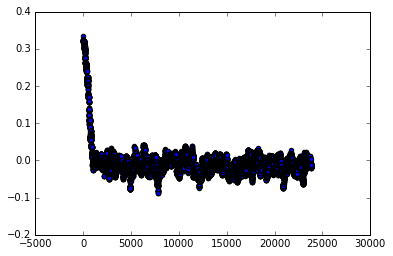

T2T weights


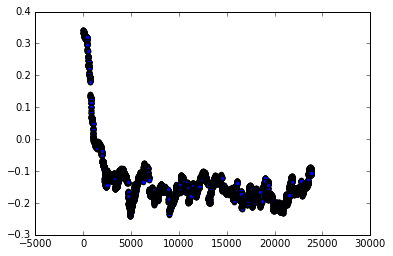

SameCNG weights


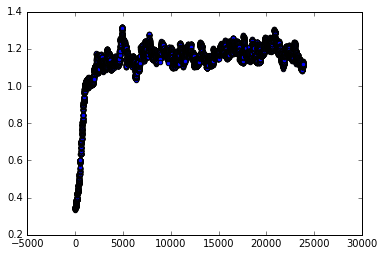

In [11]:
print('W2W weights')
plt.scatter(df_partitionData.index, df_partitionData['w2w'])
plt.show()

print('T2T weights')
plt.scatter(df_partitionData.index, df_partitionData['t2t'])
plt.show()

print('SameCNG weights')
plt.scatter(df_partitionData.index, df_partitionData['scng'])
plt.show()

In [25]:
df_partitionData.loc[df_partitionData['dw2w'] >= 0, 'dw2w'] += 0.01
df_partitionData.loc[df_partitionData['dw2w'] < 0, 'dw2w'] -= 0.01
plt.scatter(df_partitionData['w2w'], df_partitionData['dw2w'])
plt.show()

df_partitionData.loc[df_partitionData['dt2t'] >= 0, 'dt2t'] += 0.01
df_partitionData.loc[df_partitionData['dt2t'] < 0, 'dt2t'] -= 0.01
plt.scatter(df_partitionData['t2t'], df_partitionData['dt2t'])
plt.show()

df_partitionData.loc[df_partitionData['dscng'] >= 0, 'dscng'] += 0.01
df_partitionData.loc[df_partitionData['dscng'] < 0, 'dscng'] -= 0.01
plt.scatter(df_partitionData['scng'], df_partitionData['dscng'])
plt.show()

In [35]:

df_partitionData['dw2w'].plot.hist(bins = 50)
plt.show()

In [26]:
df_partitionData['dt2t'].plot.hist(bins = 50)
plt.show()

In [25]:
df_partitionData['dscng'].plot.hist(bins = 50)
plt.show()

In [20]:
# di = df_partitionData['dcomb'] > 0
print(np.median(df_partitionData['w2w']))
print(np.median(df_partitionData['t2t']))
print(np.median(df_partitionData['scng']))
print('-'*50)
# di = df_partitionData['dcomb'] < 0
# print(np.median(df_partitionData.loc[di, 'w2w']))
# print(np.median(df_partitionData.loc[di, 't2t']))
# print(np.median(df_partitionData.loc[di, 'scng']))



0.239805093952
0.292113212683
0.188738249742
--------------------------------------------------


In [3]:
df_logR_train = pd.read_csv('logReg_train_full.csv')
df_logR_train.rename(columns={'DSCLemma':'DCSLemma'}, inplace=True)

In [4]:
df_logR_train.DCSLemma = df_logR_train.DCSLemma.astype(int)
df_logR_train.head()

,w2w,t2t,scng,DCSLemma
0,0.160732,0.008400,0.015336,0
1,0.079843,0.048405,0.022870,0
2,0.033095,0.023786,0.016010,1
3,0.015576,0.054394,0.016931,1
4,0.022857,0.045176,0.013566,1


In [5]:
df_logR_train_pos = df_logR_train[df_logR_train.DCSLemma == True]
df_logR_train_neg = df_logR_train[df_logR_train.DCSLemma == False]

In [16]:
print(df_logR_train_neg.shape)
print(df_logR_train_pos.shape)
df_logR_train_neg2 = df_logR_train_neg.loc[0::2]
frames = [df_logR_train_pos, df_logR_train_neg2]
df_logR_train_small = pd.concat(frames)
print(df_logR_train_small.shape)

(919378, 4)
(506975, 4)
(966664, 4)


In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_logR_train_pos.w2w, df_logR_train_pos.t2t, df_logR_train_pos.scng, c='r', marker='o')
ax.scatter(df_logR_train_neg.w2w, df_logR_train_neg.t2t, df_logR_train_neg.scng, c='b', marker='^')
plt.show()

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold

In [8]:
lr = LogisticRegression(solver='lbfgs', fit_intercept=False) # lbfgs, No Bias
# lr.fit()
kf = KFold(df_logR_train_small.shape[0],4)

In [17]:
df_logR_train_small = df_logR_train_small.iloc[np.random.permutation(len(df_logR_train_small))]
df_logR_train_small = df_logR_train_small.reset_index(drop=True)
df_logR_train_small

,w2w,t2t,scng,DCSLemma
0,1.449240e-03,0.002752,0.001984,0
1,0.000000e+00,0.000000,0.000000,0
2,3.023357e-03,0.004723,0.004042,0
3,0.000000e+00,0.000000,0.000000,0
4,7.627570e-03,0.023363,0.014294,1
5,0.000000e+00,0.000000,0.000000,0
6,3.297532e-03,0.003956,0.003920,1
7,0.000000e+00,0.000000,0.000000,0
8,0.000000e+00,0.000000,0.000000,1
9,1.437285e-02,0.014105,0.016851,0


In [19]:
df_logR_train_small = df_logR_train
for train, test in kf:
    print(np.sum(df_logR_train_small.loc[train, 'DCSLemma']), 'pos training example of', df_logR_train_small.loc[train].shape[0])
    lr.fit(df_logR_train_small.loc[train, ['w2w', 't2t', 'scng']], df_logR_train_small.loc[train, 'DCSLemma'])
    print(np.sum(df_logR_train_small.loc[test, 'DCSLemma'] == lr.predict(df_logR_train_small.loc[test, ['w2w', 't2t', 'scng']]))/len(test))
    print(lr.coef_)

258601 pos training example of 724998
0.638976935109
[[ 18.51990433 -14.01478597 -26.68028975]]
257664 pos training example of 724998
0.634069335364
[[ 19.49977441 -13.55265517 -28.14728791]]
261516 pos training example of 724998
0.65156455604
[[ 18.77040354 -13.33564531 -27.73590531]]
257258 pos training example of 724998
0.633109332715
[[ 19.03079896 -14.034943   -27.31044099]]
